In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,BatchNormalization,Dropout

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\Mystic\Desktop\Research Project\train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\Mystic\Desktop\Research Project\test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 647s 1s/step - loss: 1.4994 - accuracy: 0.5954 - val_loss: 0.6102 - val_accuracy: 0.6778
Epoch 2/10
625/625 [==============================] - 646s 1s/step - loss: 0.5775 - accuracy: 0.7030 - val_loss: 0.5324 - val_accuracy: 0.7428
Epoch 3/10
625/625 [==============================] - 627s 1s/step - loss: 0.4933 - accuracy: 0.7629 - val_loss: 0.4729 - val_accuracy: 0.7782
Epoch 4/10
625/625 [==============================] - 631s 1s/step - loss: 0.4410 - accuracy: 0.7994 - val_loss: 0.4806 - val_accuracy: 0.7766
Epoch 5/10
625/625 [==============================] - 632s 1s/step - loss: 0.3931 - accuracy: 0.8254 - val_loss: 0.5104 - val_accuracy: 0.7280
Epoch 6/10
625/625 [==============================] - 619s 989ms/step - loss: 0.3136 - accuracy: 0.8673 - val_loss: 0.5515 - val_accuracy: 0.7334
Epoch 7/10
625/625 [==============================] - 620s 991ms/step - loss: 0.2454 - accuracy: 0.8977 - val_loss: 0.5621 - val_accuracy: 

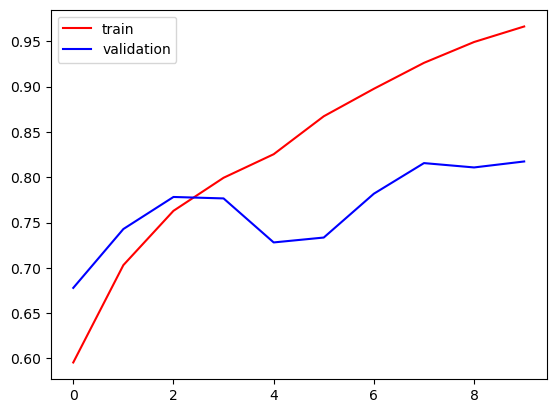

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

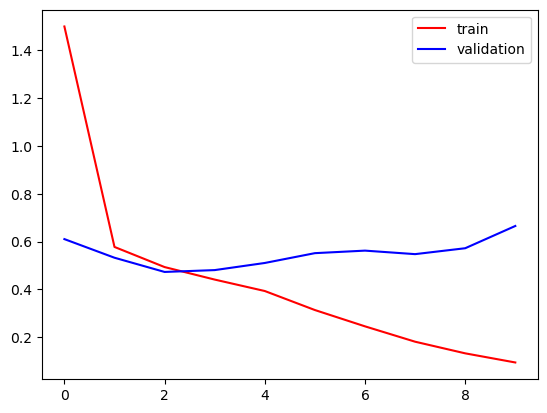

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [53]:
import cv2

In [54]:
test_img = cv2.imread(r'C:\Users\Mystic\Desktop\Research Project\download.jpeg')

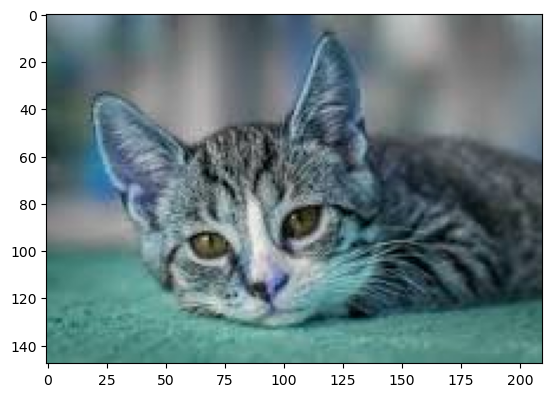

In [55]:
plt.imshow(test_img)

In [56]:
test_img.shape

(148, 210, 3)

In [57]:
test_img = cv2.resize(test_img,(256,256))

In [58]:
test_input = test_img.reshape((1,256,256,3))

In [59]:
model.predict(test_input)

1/1 [==============================] - 0s 38ms/step


array([[0.]], dtype=float32)

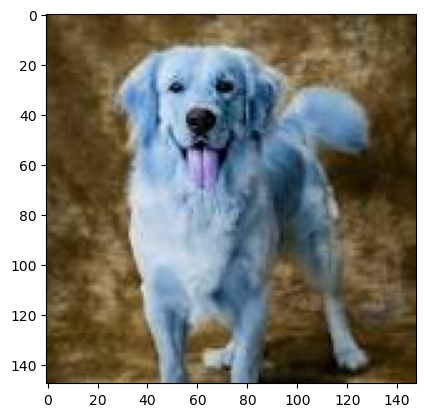

In [60]:
test_img1 = cv2.imread(r'C:\Users\Mystic\Desktop\Research Project\Dog.jpeg')
plt.imshow(test_img1)

In [61]:
test_img1.shape

(148, 148, 3)

In [62]:
test_img1 = cv2.resize(test_img1,(256,256))

In [63]:
test_input1 = test_img1.reshape((1,256,256,3))

In [64]:
model.predict(test_input1)

1/1 [==============================] - 0s 31ms/step


array([[1.]], dtype=float32)